In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/find_best.csv')

flop = df['size'] * df['size'] * (2 * df['size'] - 1)
df['MFLOP/J'] = (flop / 1e6) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']

df

,pin,size,threads,runtime,runtimestd,usertime,usertimestd,energy,energystd,MFLOP/J,GFLOP/s
0,True,500,1,0.434527,0.000192,0.434459,0.000185,6.944542,0.148050,35.963493,0.574763
1,True,500,2,0.217918,0.001240,0.434692,0.001259,4.183298,0.074256,59.701705,1.146074
2,True,500,3,0.150119,0.010621,0.434817,0.000201,3.398374,0.133378,73.491027,1.663678
3,True,500,4,0.109587,0.000374,0.434956,0.000177,2.858232,0.017164,87.379205,2.279004
4,True,500,5,0.106199,0.001688,0.521324,0.001559,2.836113,0.026469,88.060660,2.351714
...,...,...,...,...,...,...,...,...,...,...,...
347,False,1500,12,1.867366,0.039268,21.760780,0.163775,75.833313,0.825244,88.981343,3.613512
348,False,1500,13,1.934518,0.041369,24.614006,0.477188,78.473854,2.035806,85.987238,3.488079
349,False,1500,14,1.976179,0.040759,27.241798,0.547593,80.389557,1.849130,83.938141,3.414544
350,False,1500,15,2.092710,0.013005,31.026007,0.187191,84.029587,0.586166,80.302073,3.224408


In [3]:
df_grouped = df.groupby(['size', 'pin'])

/tmp/ipykernel_375629/2483594043.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,6))


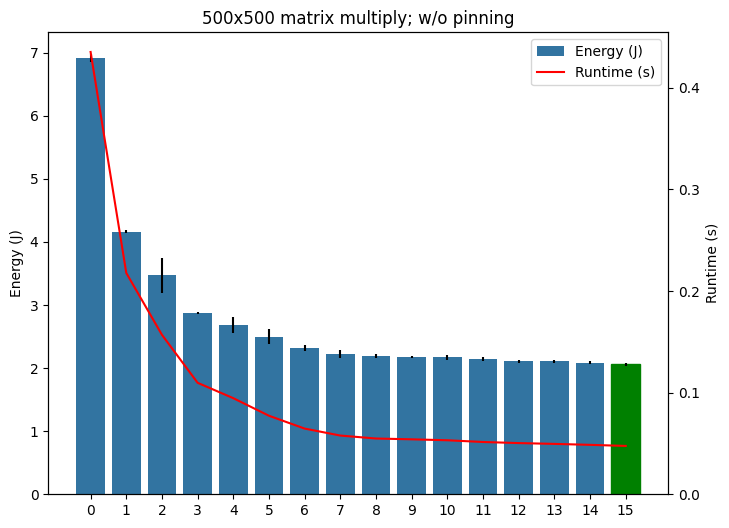

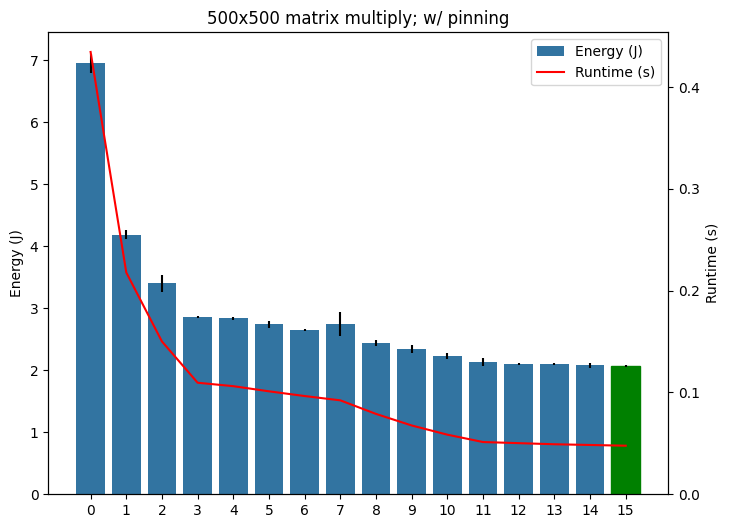

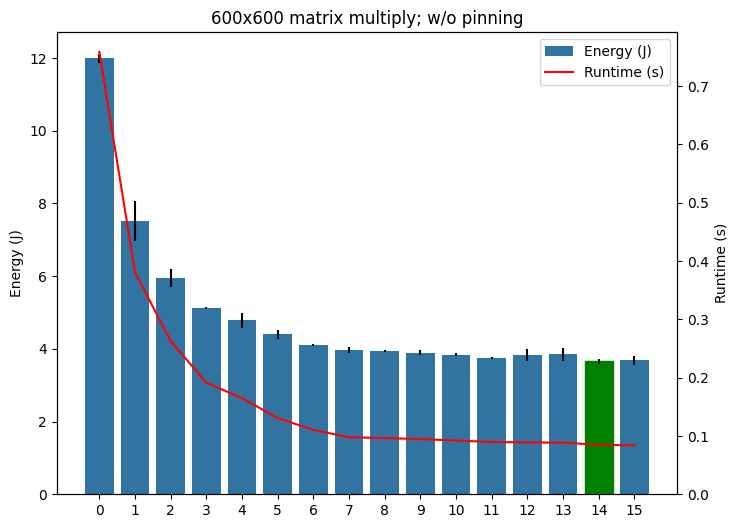

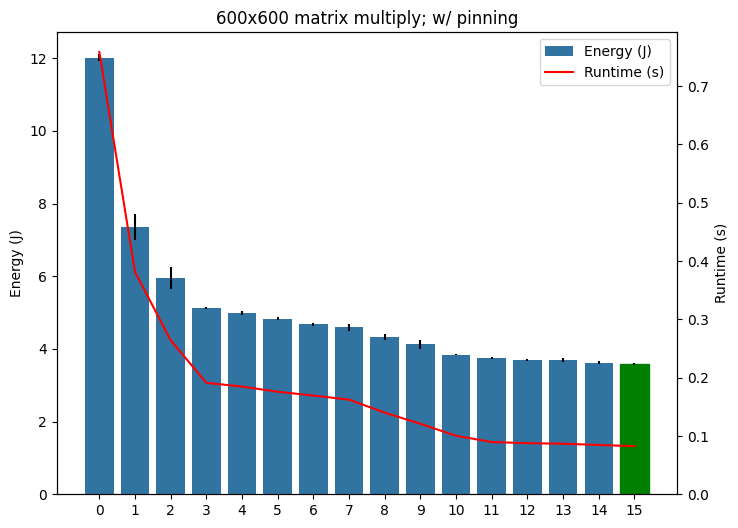

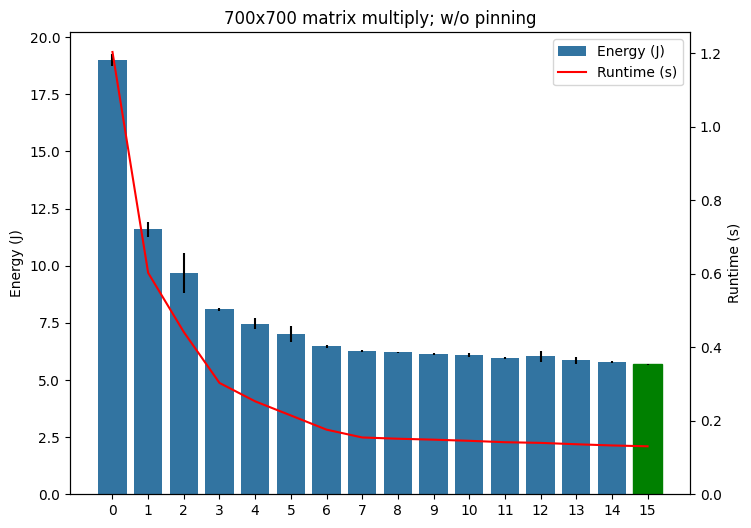

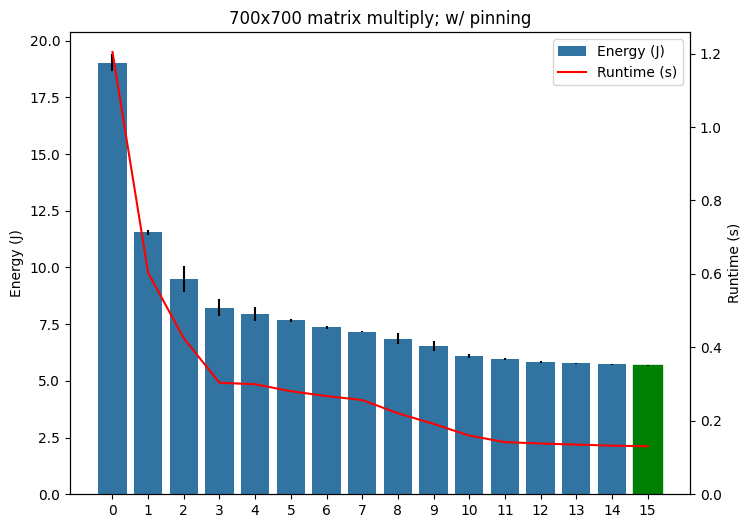

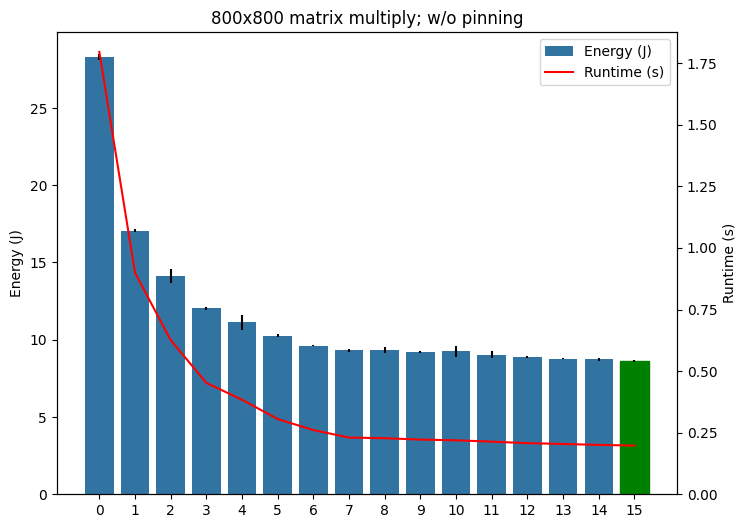

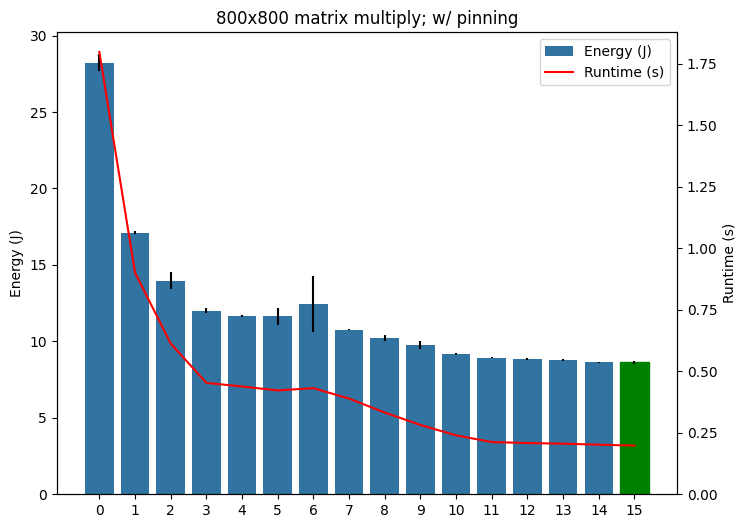

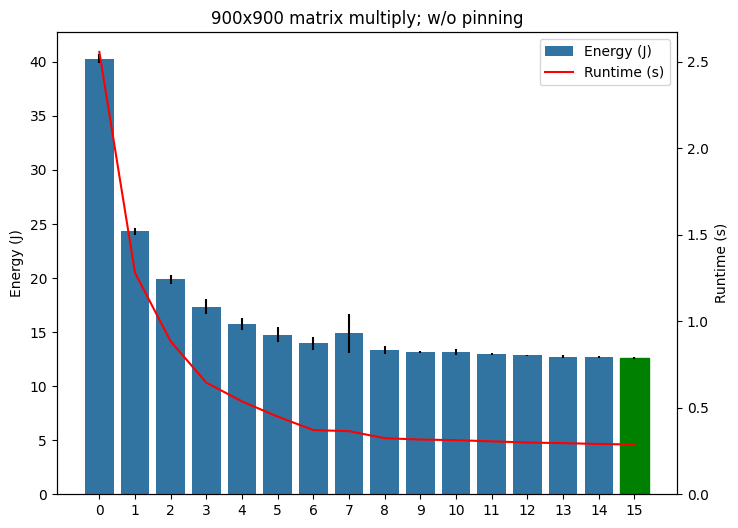

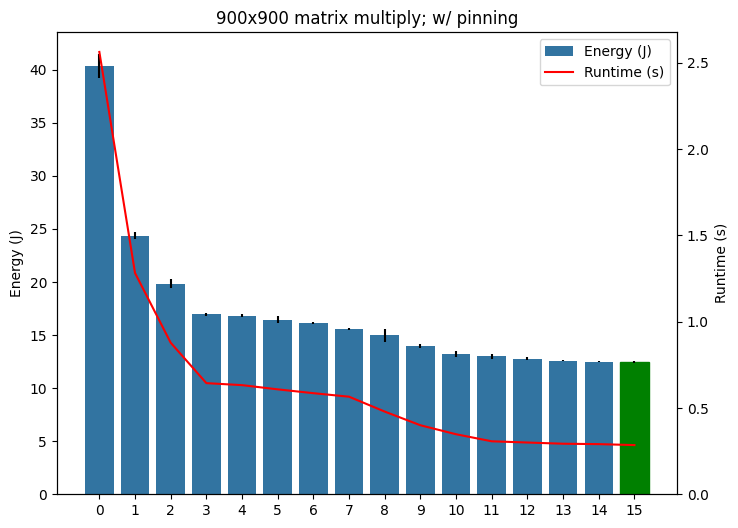

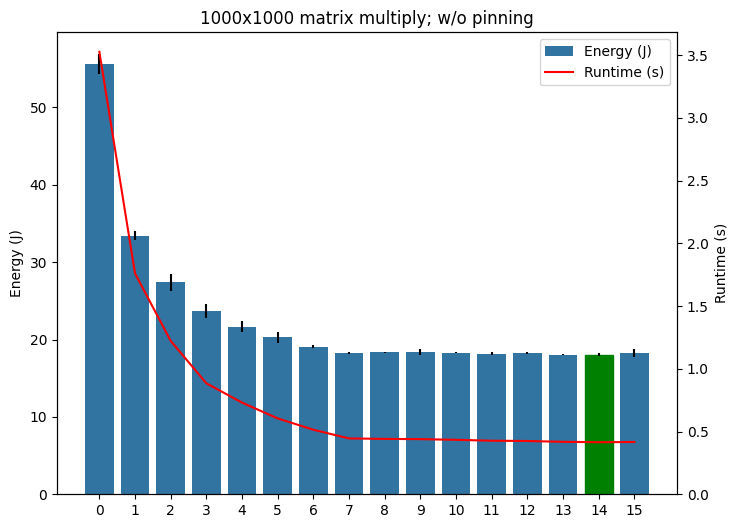

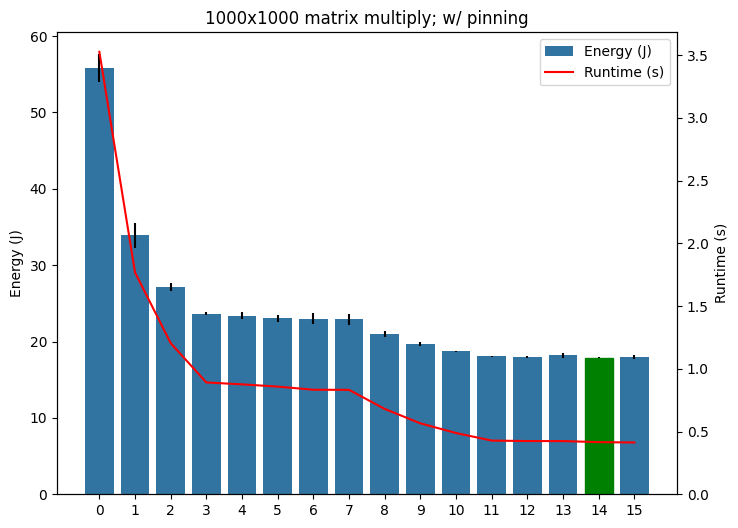

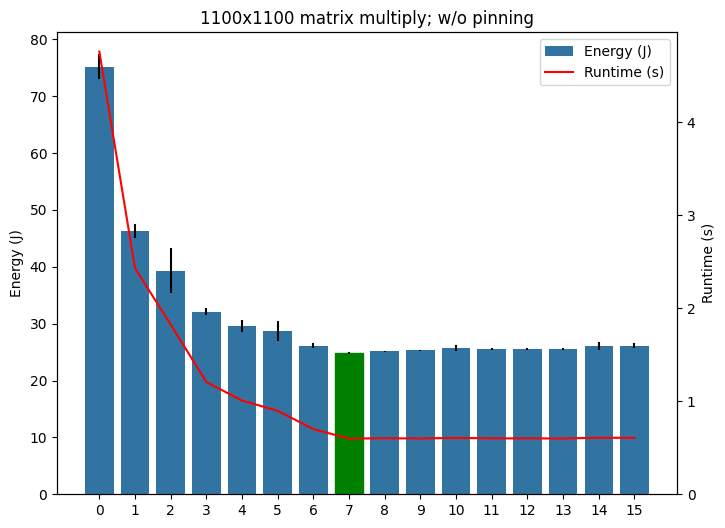

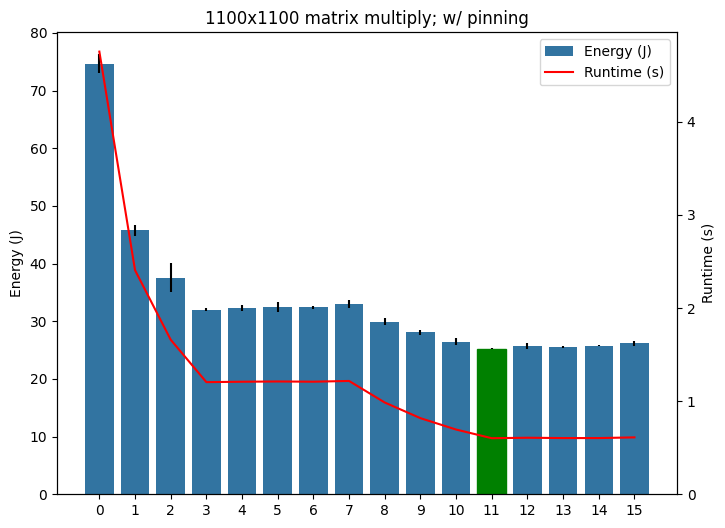

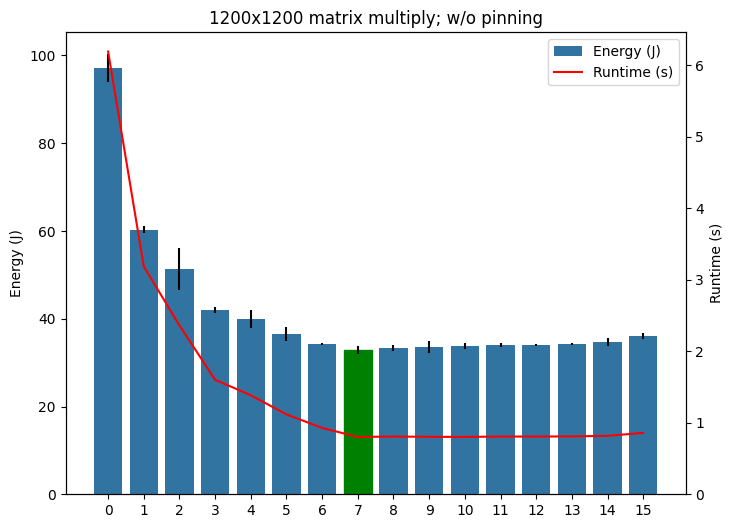

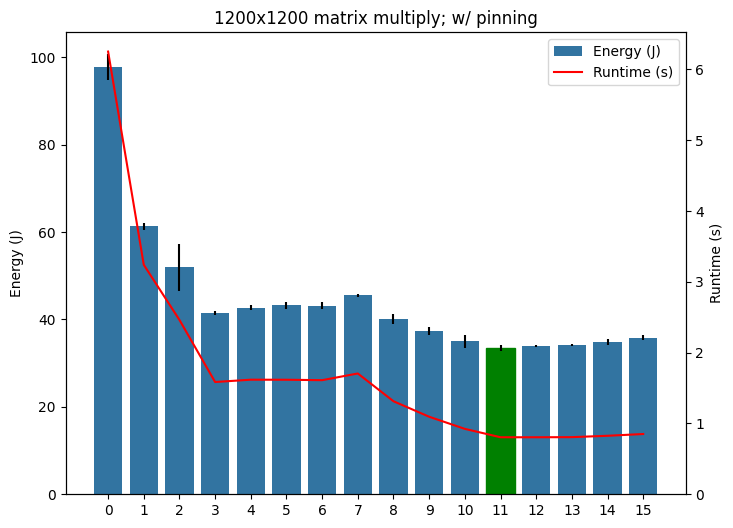

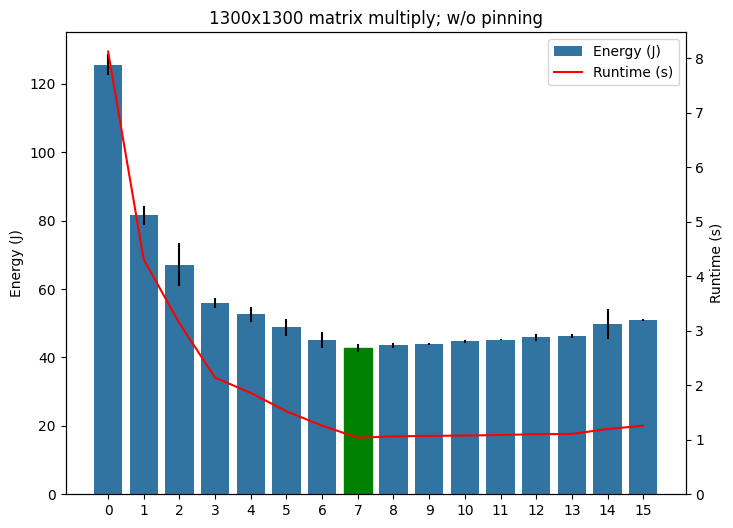

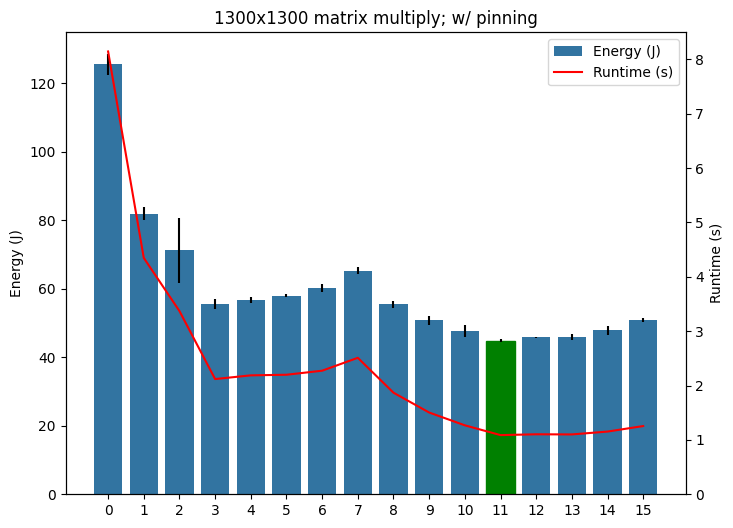

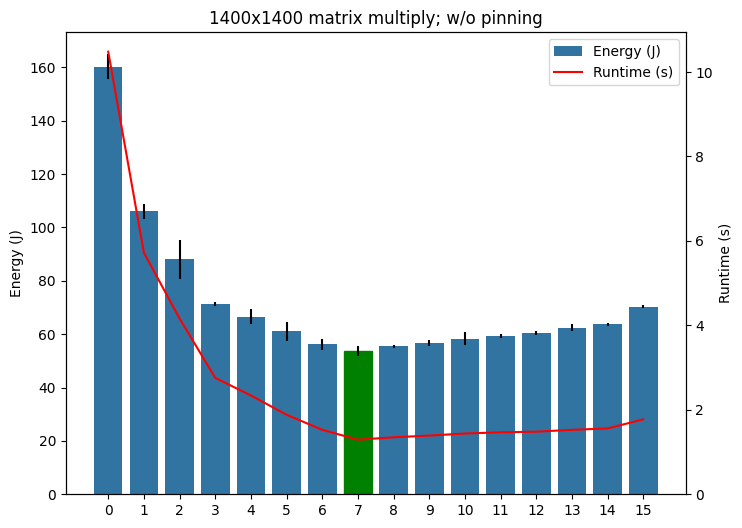

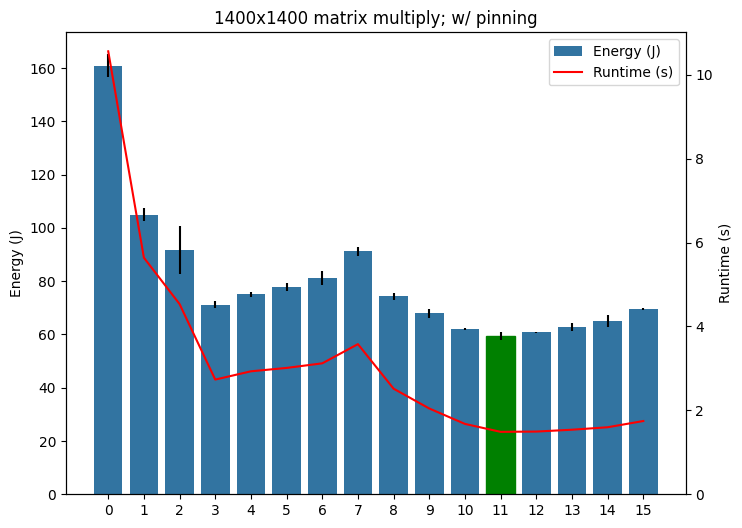

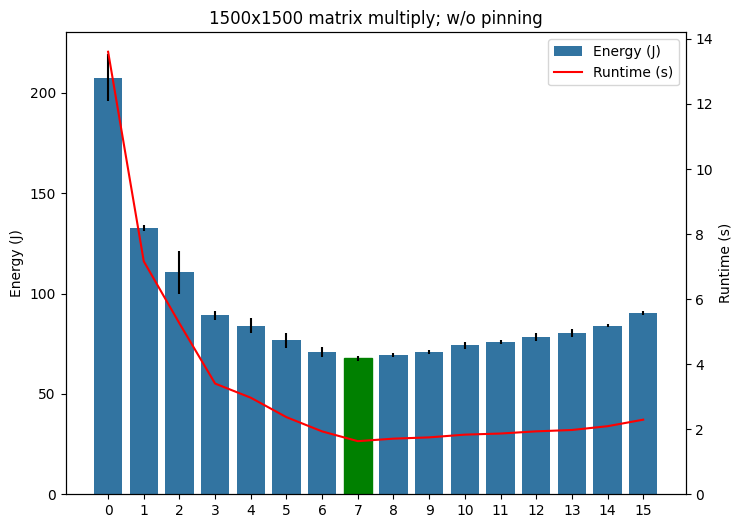

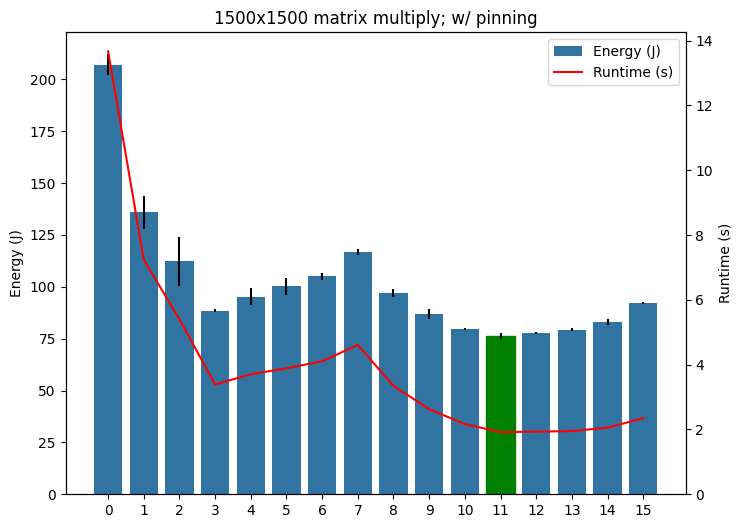

In [4]:
for (size, pin), dfx in df_grouped:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['energy'], label='Energy (J)', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['runtime'], label='Runtime (s)', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply; {'w/' if pin else 'w/o'} pinning')
    ax.set_ylabel('Energy (J)')
    ax2.set_ylabel('Runtime (s)')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=dfx['energy'], yerr=dfx['energystd'], fmt='none', c='black')

    for bar in ax.patches:
        if bar.get_height() == dfx['energy'].min():
            bar.set_color('g')
            break

plt.show()

/tmp/ipykernel_375629/1966719659.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,6))


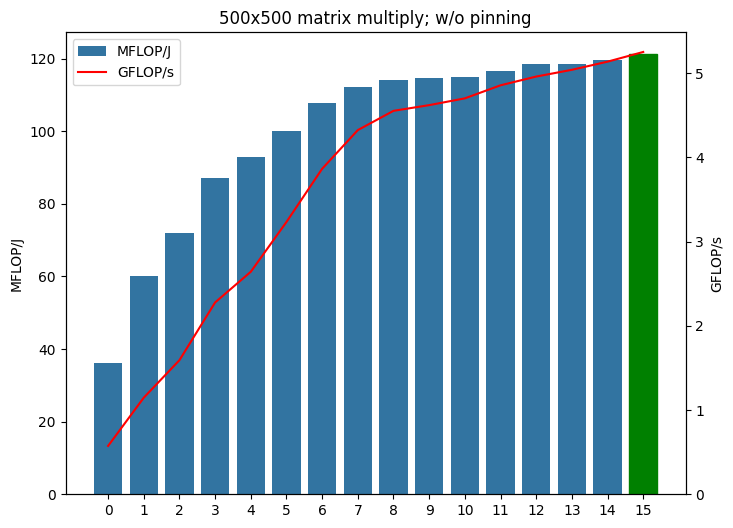

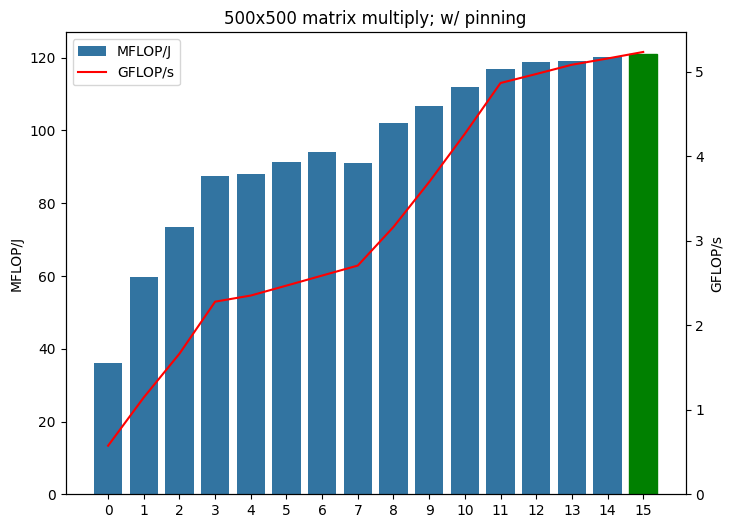

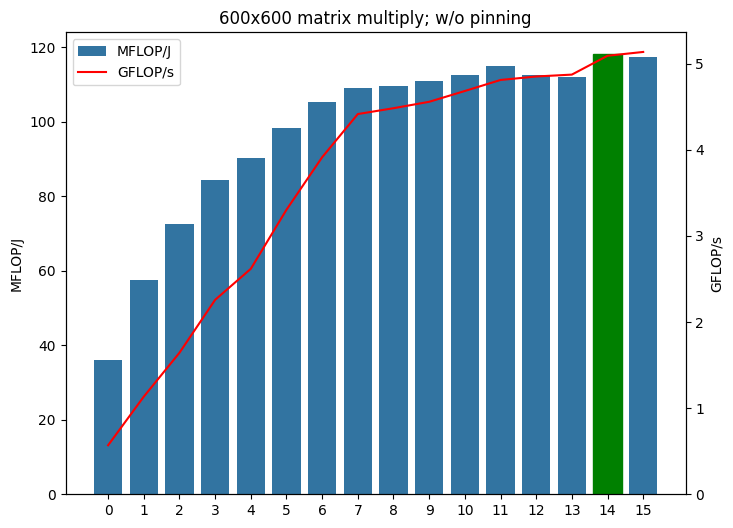

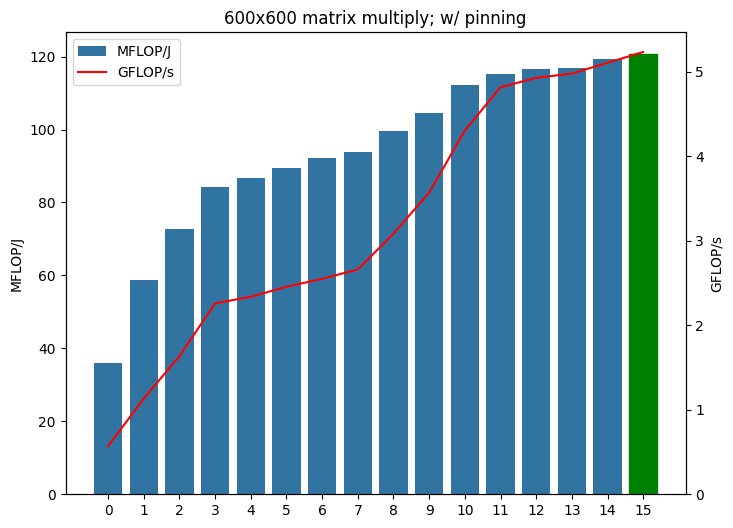

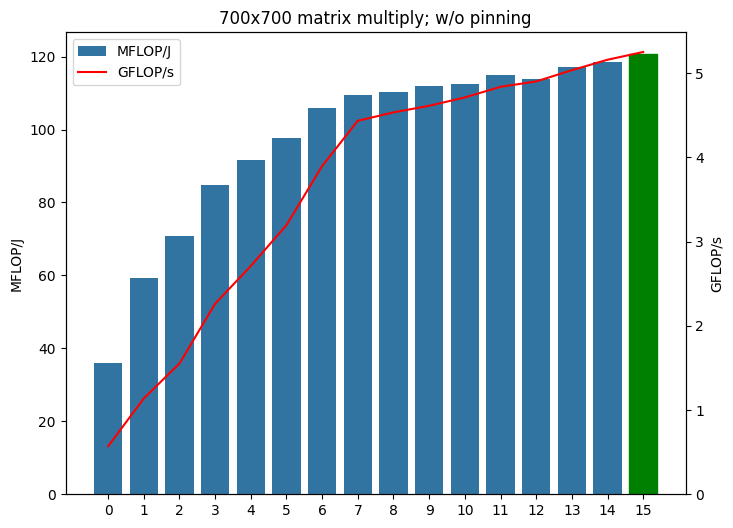

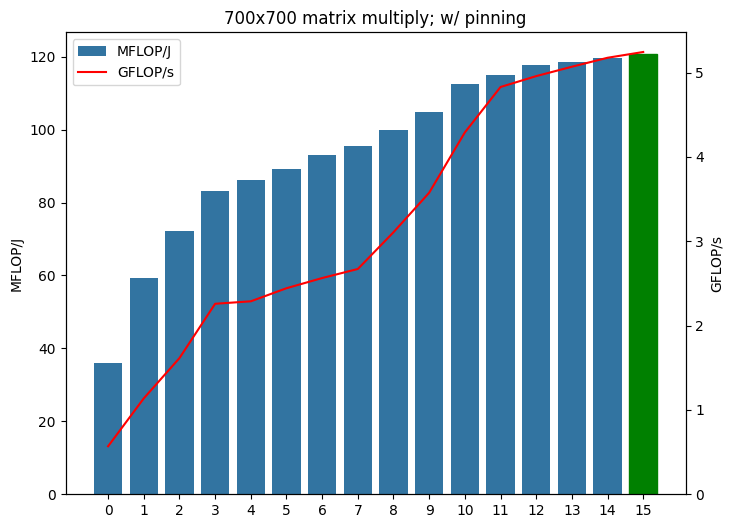

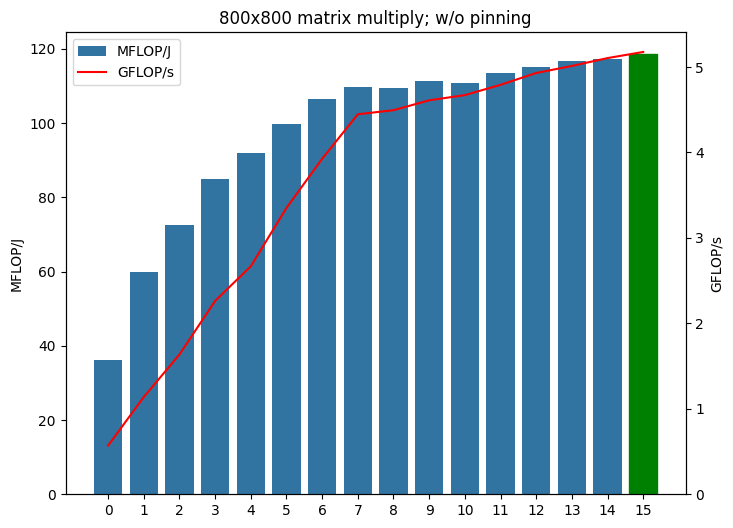

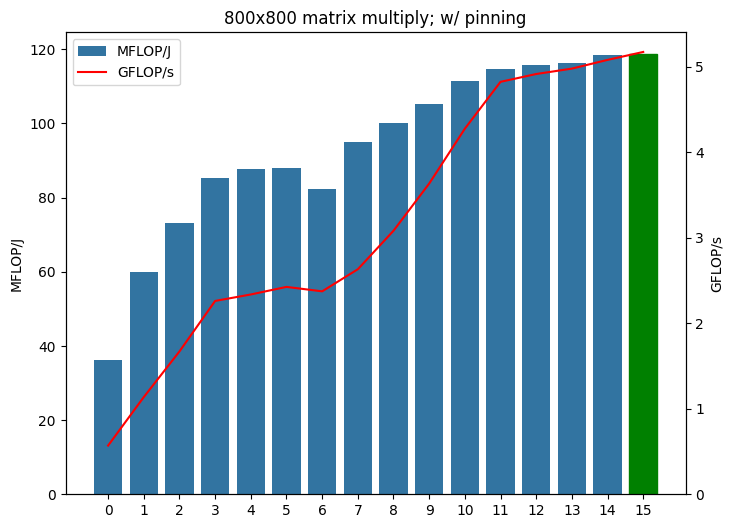

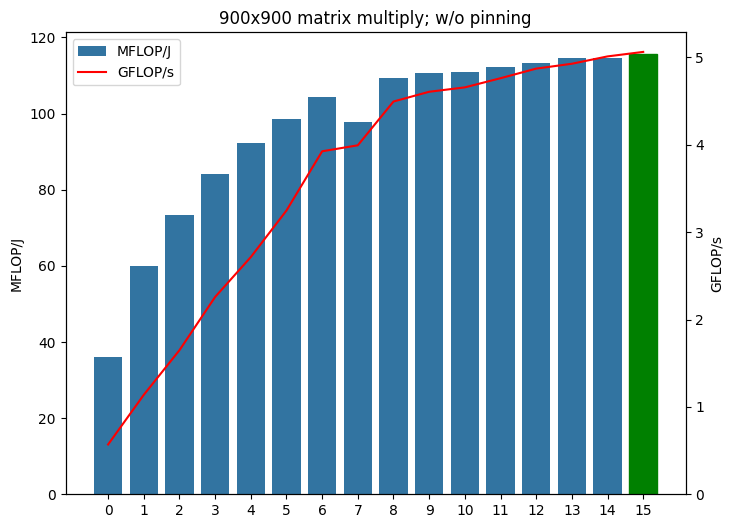

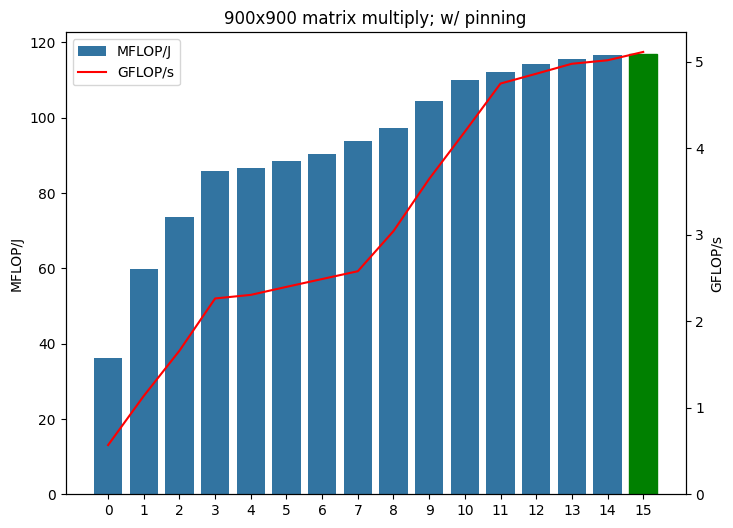

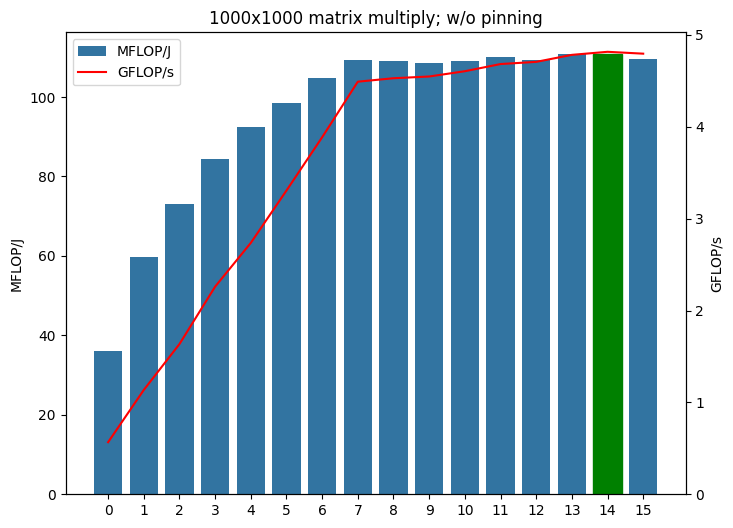

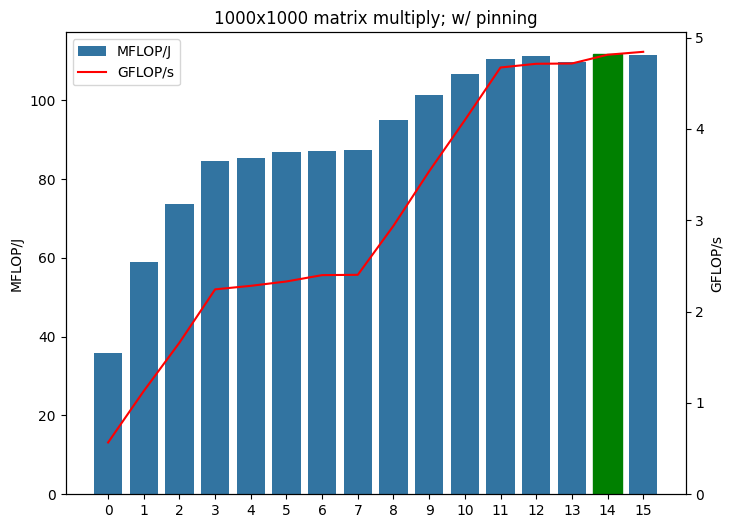

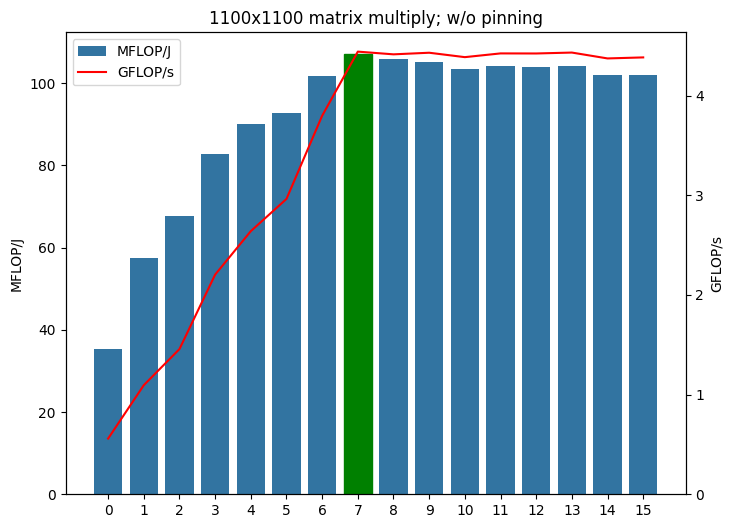

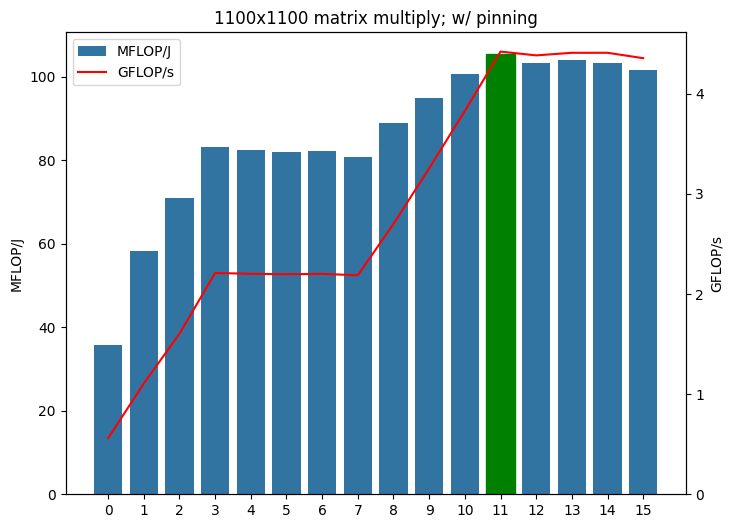

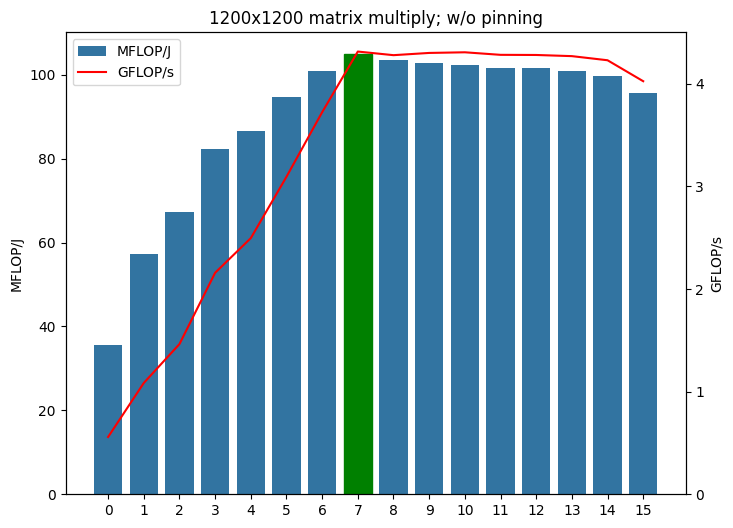

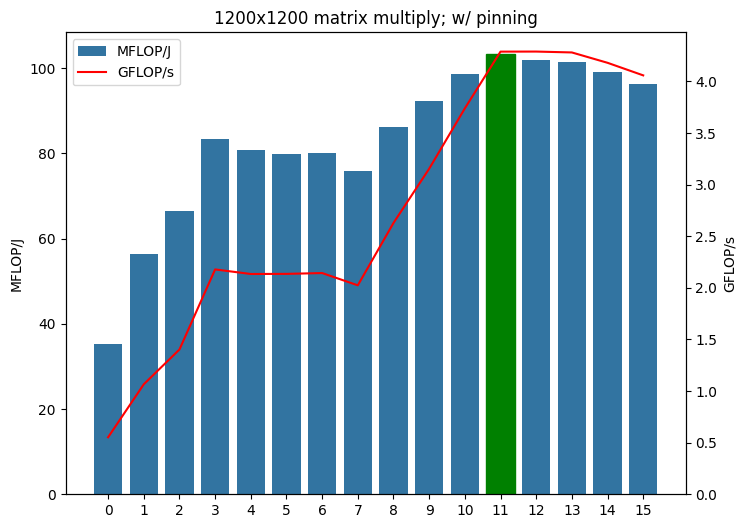

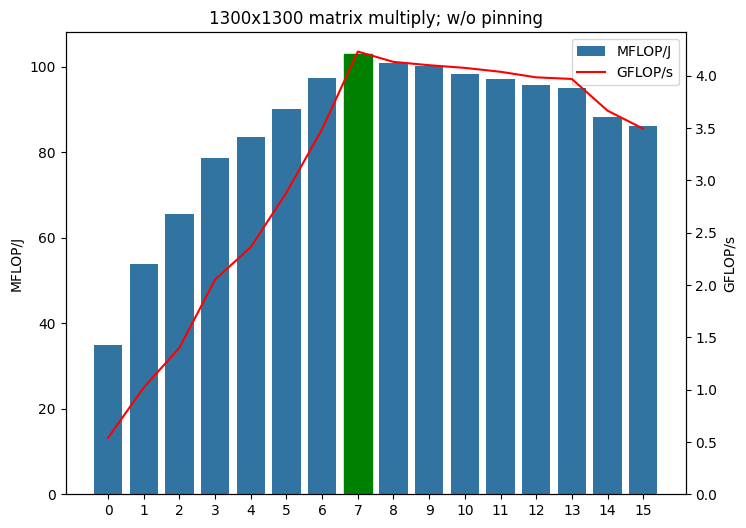

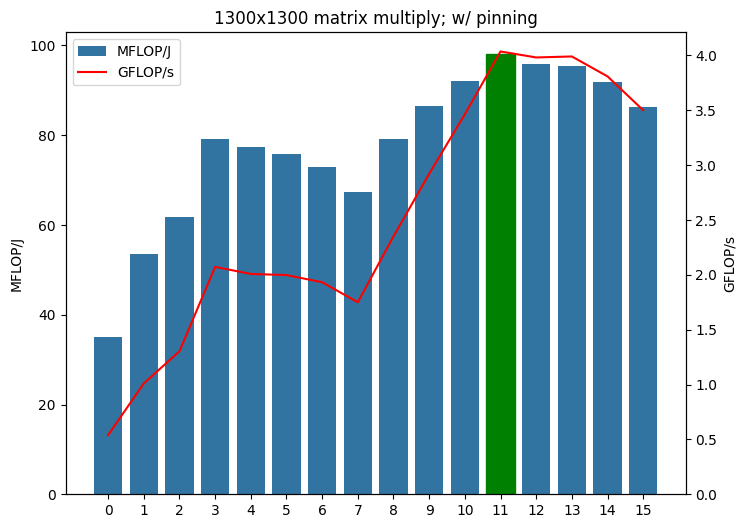

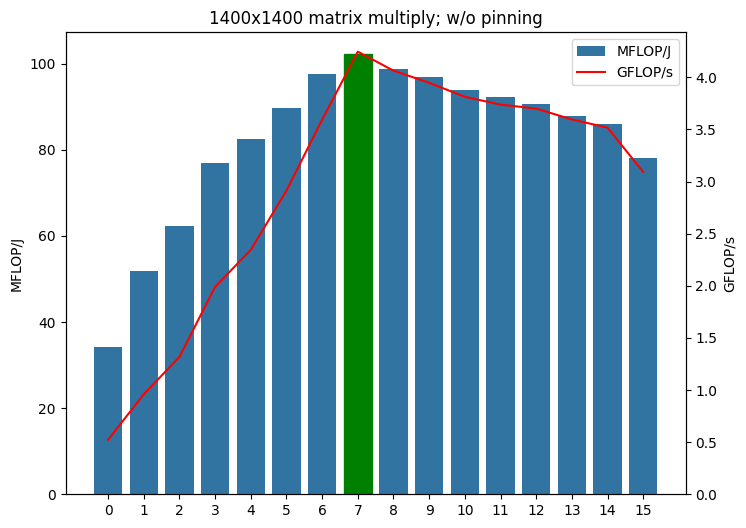

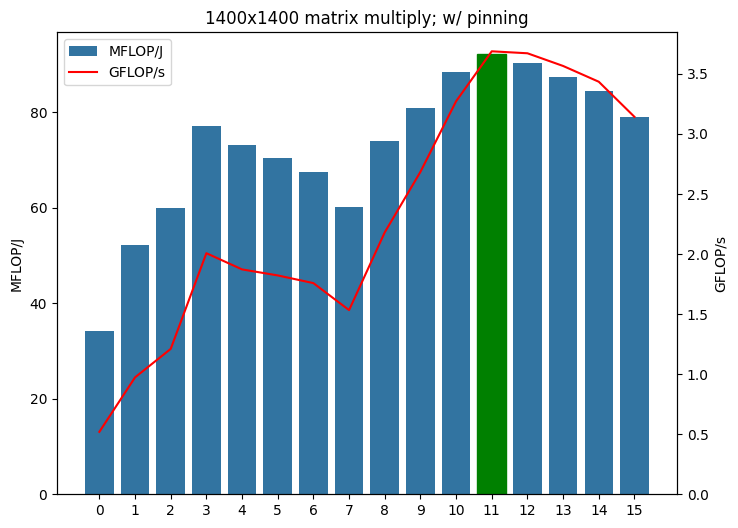

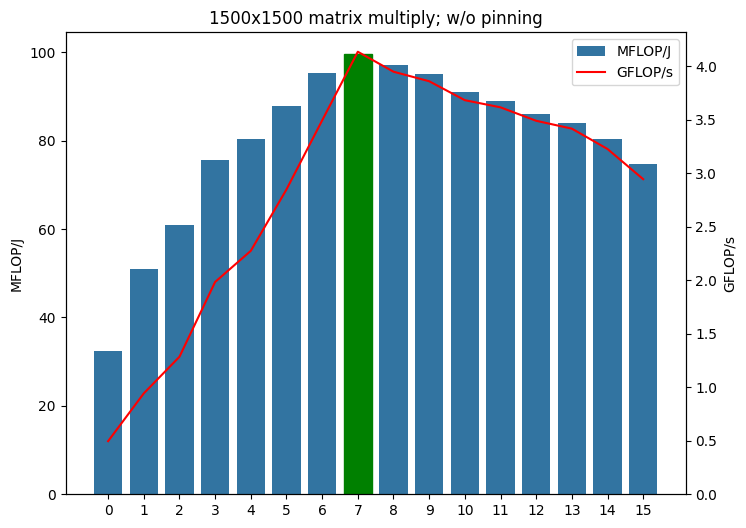

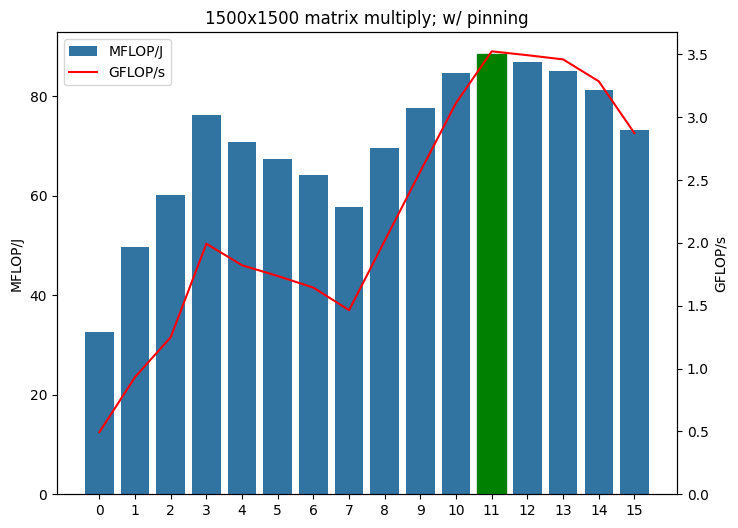

In [5]:
for (size, pin), dfx in df_grouped:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['MFLOP/J'], label='MFLOP/J', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['GFLOP/s'], label='GFLOP/s', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply; {'w/' if pin else 'w/o'} pinning')
    ax.set_ylabel('MFLOP/J')
    ax2.set_ylabel('GFLOP/s')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    for bar in ax.patches:
        if bar.get_height() == dfx['MFLOP/J'].max():
            bar.set_color('g')
            break

plt.show()